<a href="https://colab.research.google.com/github/SahilJin123/DeepLearning/blob/main/cifar_10_dataset_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt 

In [39]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [20]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [40]:
#to flatten the array alway's use it like this
##Now we have to flatten the array y_train
y_train = y_train.reshape(-1,)
y_train 

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [41]:
classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']				

In [23]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

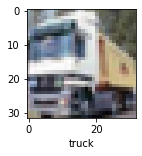

In [27]:
plot_sample(x_train,y_train,1)

In [42]:
x_train=x_train/255

In [43]:
x_test=x_test/255

In [33]:
ann = models.Sequential(
    [
     layers.Flatten(input_shape = (32,32,3)),
     layers.Dense(3000,activation = 'relu'),
     layers.Dense(1000,activation = 'relu'),
     layers.Dense(10,activation = 'tanh'),
    ]
)

In [36]:
ann.compile(
     optimizer = 'adam',
     loss = 'sparse_categorical_crossentropy',
     metrics = ['accuracy'])

ann.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 133s 85ms/step - loss: 2.3165 - accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 134s 86ms/step - loss: 2.3026 - accuracy: 0.0999
Epoch 3/5
1563/1563 [==============================] - 139s 89ms/step - loss: 2.3026 - accuracy: 0.0999
Epoch 4/5
1563/1563 [==============================] - 150s 96ms/step - loss: 2.3026 - accuracy: 0.0999
Epoch 5/5
1563/1563 [==============================] - 137s 88ms/step - loss: 2.3026 - accuracy: 0.0999


In [38]:
cnn = models.Sequential(
    [
     #cnn
     layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
     layers.MaxPooling2D((2,2)),

     layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     #dense
     layers.Flatten(),
     layers.Dense(64,activation = 'relu'),
     layers.Dense(10,activation = 'softmax'),
    ]
)

In [44]:
cnn.compile(
     optimizer = 'adam',
     loss = 'sparse_categorical_crossentropy',
     metrics = ['accuracy'])

cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4714 - accuracy: 0.4692
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1290 - accuracy: 0.6063
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0068 - accuracy: 0.6506
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9244 - accuracy: 0.6790
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8621 - accuracy: 0.7007
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8109 - accuracy: 0.7203
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7684 - accuracy: 0.7342
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7301 - accuracy: 0.7478
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6964 - accuracy: 0.7589
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [45]:
y_test = y_test.reshape(-1,)
y_test 

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [46]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8976 - accuracy: 0.7049


[0.8976101279258728, 0.7049000263214111]

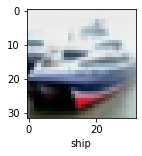

In [47]:
plot_sample(x_test,y_test,1)

In [48]:
y_predict = cnn.predict(x_test)
y_predict[:20]

array([[5.31305419e-03, 8.42152622e-06, 1.80569245e-03, 9.09782529e-01,
        3.06135975e-04, 7.86056221e-02, 6.96062227e-04, 5.14776220e-05,
        3.25287459e-03, 1.78069007e-04],
       [1.07099954e-03, 8.37869942e-02, 1.11807685e-05, 6.52107872e-07,
        6.63494504e-08, 1.07261542e-08, 5.34176081e-08, 3.84420096e-09,
        9.15045083e-01, 8.49967400e-05],
       [2.18140736e-01, 3.41931701e-01, 2.56649265e-03, 3.32535543e-02,
        3.13679455e-03, 3.26052634e-03, 1.32953434e-03, 1.99092273e-03,
        2.95303464e-01, 9.90863293e-02],
       [7.61940956e-01, 6.71643717e-03, 5.64432936e-03, 1.62222958e-03,
        1.03566307e-03, 1.35862701e-05, 9.83355916e-04, 7.30440206e-06,
        2.21468434e-01, 5.67635405e-04],
       [2.39187884e-05, 2.03860200e-05, 3.79304364e-02, 4.79520857e-02,
        4.59348708e-01, 1.02633880e-02, 4.44152862e-01, 2.30607882e-04,
        7.40642718e-05, 3.46807792e-06],
       [1.02896115e-03, 1.24185544e-03, 1.55621599e-02, 9.60128233e-02,
   

In [49]:
np.argmax(y_predict[1])

8

In [50]:
classes[8]

'ship'